## 1. Import Dependencies 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Deep learning modules
from keras.models import Sequential 
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping


2025-06-17 18:47:25.900114: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750186046.101790      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750186046.164236      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
df=pd.read_csv('/kaggle/input/house-price/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## 2 .Preprocessing 

In [3]:
df.shape

(20640, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## 3.Encoding 

In [9]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [10]:
df['ocean_proximity'] = df['ocean_proximity'].map({
    "<1H OCEAN": 0,
    "INLAND": 1,
    "NEAR OCEAN": 2,
    "NEAR BAY": 3,
    "ISLAND": 4
})


In [11]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


## 4. Train test Split

In [12]:
X=df.drop("median_house_value",axis=1)
y=df["median_house_value"]

In [13]:
X=np.array(X)
y=np.array(y)

In [14]:
X

array([[-1.2223e+02,  3.7880e+01,  4.1000e+01, ...,  1.2600e+02,
         8.3252e+00,  3.0000e+00],
       [-1.2222e+02,  3.7860e+01,  2.1000e+01, ...,  1.1380e+03,
         8.3014e+00,  3.0000e+00],
       [-1.2224e+02,  3.7850e+01,  5.2000e+01, ...,  1.7700e+02,
         7.2574e+00,  3.0000e+00],
       ...,
       [-1.2122e+02,  3.9430e+01,  1.7000e+01, ...,  4.3300e+02,
         1.7000e+00,  1.0000e+00],
       [-1.2132e+02,  3.9430e+01,  1.8000e+01, ...,  3.4900e+02,
         1.8672e+00,  1.0000e+00],
       [-1.2124e+02,  3.9370e+01,  1.6000e+01, ...,  5.3000e+02,
         2.3886e+00,  1.0000e+00]])

In [15]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

In [16]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(16346, 9)
(4087, 9)
(16346,)
(4087,)


## 4. Scaling 

In [17]:
min_max_scaler=MinMaxScaler()
x_train_scaled=min_max_scaler.fit_transform(x_train)
x_test_scaled=min_max_scaler.transform(x_test)

In [18]:
x_train_scaled

array([[0.54425229, 0.30180659, 0.66666667, ..., 0.06101974, 0.21336947,
        0.25      ],
       [0.30315361, 0.58448459, 0.56862745, ..., 0.00707237, 0.27586516,
        0.25      ],
       [0.6948118 , 0.16790648, 0.09803922, ..., 0.25542763, 0.25377581,
        0.25      ],
       ...,
       [0.23601221, 0.51328374, 0.68627451, ..., 0.05411184, 0.2810375 ,
        0.        ],
       [0.19226857, 0.55366631, 1.        , ..., 0.06069079, 0.26132053,
        0.75      ],
       [0.51068159, 0.19978746, 0.43137255, ..., 0.12648026, 0.29727866,
        0.5       ]])

## 5. Model Training and Architecture

In [19]:
x_train_scaled.shape

(16346, 9)

In [20]:
model = Sequential([
    # Input layer
    Dense(1000, input_shape=[x_train.shape[1]], activation='relu'),
    
    # Hidden layers
    Dense(500, activation='relu'),
    Dense(250, activation='relu'),
    
    # Output layer
    Dense(1, activation='linear')  # For regression tasks
])

# Call the method
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1750186170.360324      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1000)                │          10,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 500)                 │         500,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 250)                 │         125,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             251 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 636,001 (2.43 MB)

 Trainable params: 636,001 (2.43 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer='rmsprop',loss='mse', metrics=['mae'])
early_stop=EarlyStopping(monitor='val_loss', mode='min',patience=50, restore_best_weights=True)

In [22]:
# Fit the model with early stopping
history = model.fit(
    x_train_scaled, y_train,
    validation_data=(x_test_scaled, y_test),  # Pass validation set directly
    epochs=500,
    batch_size=32,
    callbacks=[early_stop]
)


Epoch 1/500


I0000 00:00:1750186202.952952      96 service.cc:148] XLA service 0x7f6024009d70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750186202.953444      96 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1750186203.137383      96 cuda_dnn.cc:529] Loaded cuDNN version 90300


 74/511 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 57534930944.0000 - mae: 210944.0469

I0000 00:00:1750186203.767365      96 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 36147810304.0000 - mae: 151886.4062 - val_loss: 9711737856.0000 - val_mae: 79290.8047
Epoch 2/500
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9050592256.0000 - mae: 75593.9141 - val_loss: 5809089024.0000 - val_mae: 56822.8633
Epoch 3/500
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5954252288.0000 - mae: 57239.6523 - val_loss: 5488093696.0000 - val_mae: 54624.4922
Epoch 4/500
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5695979520.0000 - mae: 55255.4375 - val_loss: 5292828160.0000 - val_mae: 53601.5391
Epoch 5/500
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5597723648.0000 - mae: 54325.2383 - val_loss: 5082475520.0000 - val_mae: 51671.6055
Epoch 6/500
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5300396544.0000 - mae: 53119.4492 - val_loss: 4902966272.0000 - val_mae: 50105.6562
Epoch 7/500
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5035148288.0000 - mae: 51246.2969 - val_loss: 4744931328.0000 - val_mae: 50455.

## 6. Models results and Metrices

In [23]:
y_pred=model.predict(x_test)

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [24]:
from sklearn.metrics import r2_score,mean_squared_error,mean_squared_log_error

In [28]:
# Get predictions
y_pred = model.predict(x_test_scaled)

# Reverse scaling if needed (if you scaled y values earlier)
# y_test_original = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1))
# y_pred_original = scaler_y.inverse_transform(y_pred)

# Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)

print("R² Score:", r2)
print("MSE:", mse)
print("MSLE:", msle)


128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
R² Score: 0.8068360380219344
MSE: 2476717246.522318
MSLE: 0.06055340972305454


In [31]:
# Plotting system
training_loss=history.history['loss']
validation_loss=history.history['val_loss']
epochs=range(1,len(training_loss)+1)

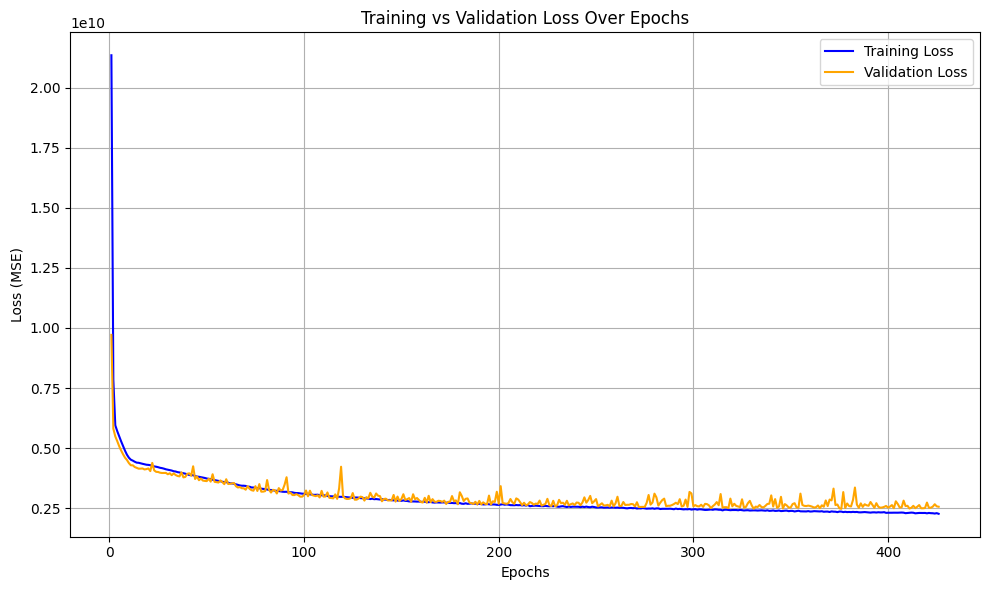

In [35]:
import matplotlib.pyplot as plt

# Assuming you have this from model.fit()
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_loss, label='Training Loss', color='blue')
plt.plot(epochs, validation_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training vs Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


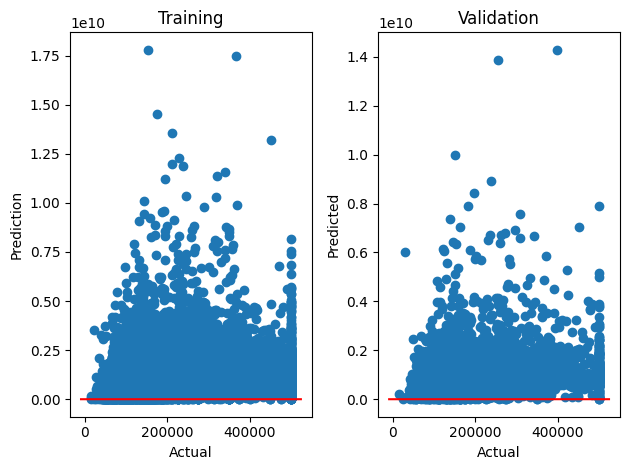

In [36]:
# Specify the dimensions 
fig, axes = plt.subplots(1,2)

# This makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=model.predict(x_train))
axes[0].set_xlabel('Actual', fontsize=10)
axes[0].set_ylabel('Prediction', fontsize=10)
axes[0].set_title('Training')

# Add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')

# Validation Results
axes[1].scatter(x=y_test, y=model.predict(x_test))
axes[1].set_xlabel('Actual', fontsize=10)
axes[1].set_ylabel('Predicted', fontsize=10)
axes[1].set_title('Validation')

# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# Tight layout
fig.tight_layout()
plt.show()

## Predictive System

In [37]:
def pred(longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity):
    features = np.array([longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity])
    features_scaled = min_max_scaler.fit_transform([features])
    results = model.predict(features_scaled).reshape(1,-1)
    return results[0]

In [38]:
longitude = -122.2300
latitude  = 37.8800
housing_median_age  = 41.0000
total_rooms        = 880.0000
total_bedrooms   =  129.0000
population     = 322.0000
households          =    126.0000
median_income       =      8.3252
ocean_proximity       =     3.0000

price = pred(longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


In [39]:
price #  452600.0000 # actual value

array([22571.215], dtype=float32)

## Save model

In [40]:
model.save("model_ann.h5")

import pickle
pickle.dump(min_max_scaler,open('scaler.pkl','wb'))

## Check version and install the same in pycharm (in production)

In [41]:
import sklearn
import tensorflow as tf
import keras

print("scikit-learn version:", sklearn.__version__)
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

scikit-learn version: 1.2.2
TensorFlow version: 2.18.0
Keras version: 3.8.0
